In [1]:
import pandas as pd

df = pd.read_pickle("../Data/out.pkl")

df.head()


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10


In [2]:
df["Majority"] = df["predict_state_SUM"] > 10
open_closed = df.groupby('Majority').count()
open_closed

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM
Majority,,,,,,,,
False,2200537,2200537,2200537,2200537,2200537,2200537,2200537,2200537
True,1901611,1901611,1901611,1901611,1901611,1901611,1901611,1901611


In [3]:
df["Majority"] = df["Majority"].astype(int)
majority = df["Majority"]
df["diffs"] = majority.diff()

regions = df[df["diffs"] != 0]
regions = regions.reset_index(drop = True)

extremes_start = regions["start"]
lenghts = extremes_start.diff()
open_region_lengths = lenghts[2::2]
closed_region_lengths = lenghts[1::2]
open_region_lengths[:50]


2       455.0
4       271.0
6       103.0
8       283.0
10     1001.0
12      244.0
14       89.0
16      121.0
18      246.0
20      259.0
22     1216.0
24      176.0
26      109.0
28      578.0
30      316.0
32      241.0
34      201.0
36      191.0
38      321.0
40      184.0
42      178.0
44      243.0
46      166.0
48      198.0
50       90.0
52      216.0
54       82.0
56      134.0
58      414.0
60      305.0
62      173.0
64       89.0
66      500.0
68       91.0
70       94.0
72      130.0
74      103.0
76      152.0
78      428.0
80      203.0
82      113.0
84       80.0
86       68.0
88       94.0
90       49.0
92      140.0
94      130.0
96       79.0
98      151.0
100     215.0
Name: start, dtype: float64

In [4]:
regions["lenght"] = regions["start"].diff().shift(-1)
regions["open"] = regions["diffs"] == 1

open_regions = regions[regions["open"] == True]
closed_regions = regions[regions["open"] == False]

open_regions.head()


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open
1,18,3002193,3002193,18_3002193,0.0,0.0,3.0,12,1,1.0,455.0,True
3,18,3003922,3003922,18_3003922,1.0,0.0,0.0,12,1,1.0,271.0,True
5,18,3004806,3004806,18_3004806,0.0,0.0,0.0,11,1,1.0,103.0,True
7,18,3005107,3005107,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True
9,18,3005448,3005448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True


In [5]:
print("PRIEŠ VALYMĄ")

short_open_regions = regions.loc[(regions['open'] == True) & (regions['lenght']  <= 75)]
short_closed_regions = regions.loc[(regions['open'] == False) & (regions['lenght']  <= 50)]

print(len(short_open_regions.index))
print(len(short_closed_regions.index))
print(len(regions.index))

PRIEŠ VALYMĄ
8887
3179
192151


In [6]:
regions = regions.drop(regions[(regions['open'] == True) & (regions['lenght']  <= 75)].index)
regions = regions.drop(regions[(regions['open'] == False) & (regions['lenght']  <= 50)].index)
regions = regions.drop(regions[(regions['open'] == regions['open'].shift(-1))].index)

regions["lenght"] = regions["start"].diff().shift(-1)



In [7]:
print("PO VALYMO")

short_open_regions = regions.loc[(regions['open'] == True) & (regions['lenght']  <= 75)]
short_closed_regions = regions.loc[(regions['open'] == False) & (regions['lenght']  <= 50)]

print(len(short_open_regions.index))
print(len(short_closed_regions.index))
print(len(regions.index))

PO VALYMO
0
0
168475


In [8]:
regions["end"] = regions["start"].shift(-1) - 1
regions["end"] = regions["end"].fillna(0).astype(int)

In [9]:
open_regions = regions[regions["open"] == True]
closed_regions = regions[regions["open"] == False]

print(open_region_lengths[:10])
open_regions.head()

2      455.0
4      271.0
6      103.0
8      283.0
10    1001.0
12     244.0
14      89.0
16     121.0
18     246.0
20     259.0
Name: start, dtype: float64


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open
1,18,3002193,3002647,18_3002193,0.0,0.0,3.0,12,1,1.0,455.0,True
3,18,3003922,3004192,18_3003922,1.0,0.0,0.0,12,1,1.0,271.0,True
5,18,3004806,3004908,18_3004806,0.0,0.0,0.0,11,1,1.0,103.0,True
7,18,3005107,3005389,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True
9,18,3005448,3006448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True


Medianos
224.0
353.0

Moda
0    94.0
dtype: float64
0    81.0
dtype: float64

Vidurkiai
398.46055771216925
641.4736398494723

Sumos
33565122.0
54035815.0

Frakcija
0.3831593947448302
0.6168406052551698


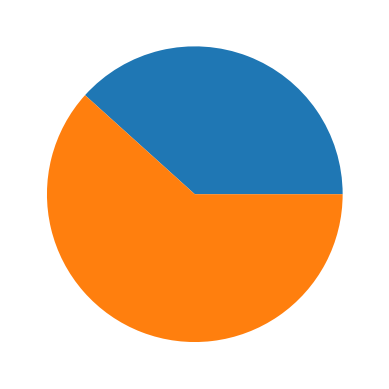

In [43]:
import matplotlib.pyplot as plt

print("Medianos")
print(open_regions["lenght"].median())
print(closed_regions["lenght"].median())

print("\nModa")
print(open_regions["lenght"].mode())
print(closed_regions["lenght"].mode())

print("\nVidurkiai")
print(open_regions["lenght"].mean())
print(closed_regions["lenght"].mean())

print("\nSumos")
s1 = open_regions["lenght"].sum()
print(s1)
s2 = closed_regions["lenght"].sum()
print(s2)

print("\nFrakcija")
print(s1/(s1+s2))
print(s2/(s1+s2))

plt.pie([s1, s2])
plt.show()

<BarContainer object of 2 artists>

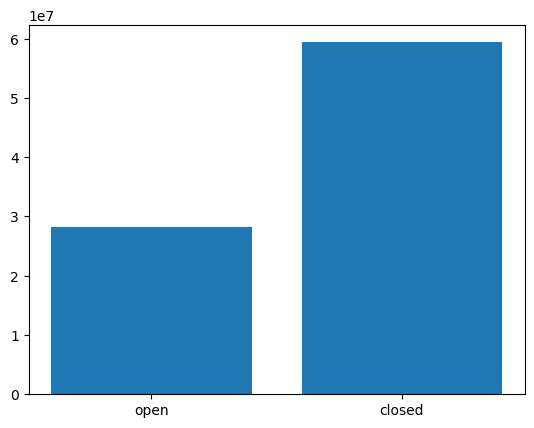

In [11]:
plt.bar(["open", "closed"], [s1, s2])

In [12]:
df

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6,0,NaN
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7,0,0.0
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7,0,0.0
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10,0,0.0
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4061463,18,90601940,90601940,18_90601940,0.0,0.0,0.0,0,0,0.0
4061464,18,90601946,90601946,18_90601946,0.0,0.0,0.0,0,0,0.0
4061465,18,90601952,90601952,18_90601952,0.0,0.0,0.0,0,0,0.0
4061466,18,90601957,90601957,18_90601957,0.0,0.0,0.0,0,0,0.0


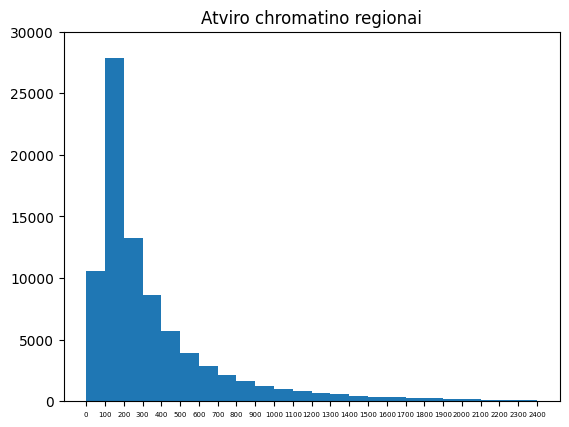

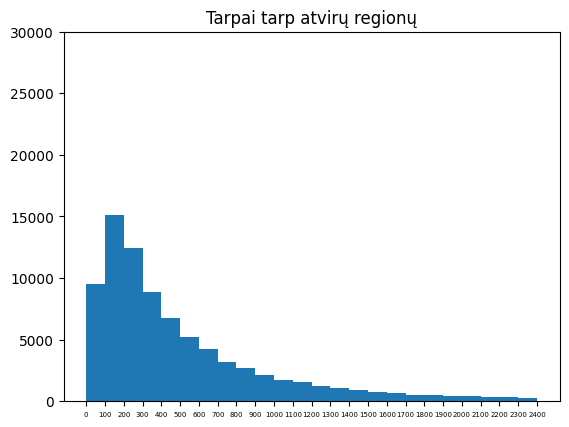

In [33]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 2500, step=100)

plt.hist(open_regions["lenght"], bins=bins, range=(-50, 2000))
plt.title("Atviro chromatino regionai")
plt.xticks(bins, fontsize = 5)

axes = plt.gca()
axes.set_ylim([0,30000])
plt.show()

plt.hist(closed_regions["lenght"], bins=bins, range=(-50, 2000))
plt.title("Tarpai tarp atvirų regionų")
plt.xticks(bins, fontsize = 5)
axes = plt.gca()
axes.set_ylim([0,30000])
plt.show()

In [14]:
import pyreadr

result = pyreadr.read_r('../Data/ATAC_dt.RDS')
atac = result[None]
print(atac.head())

  seqnames    start      end  width strand    study
0        1  3062536  3063132    597      *  ATACseq
1        1  3482735  3483063    329      *  ATACseq
2        1  3549538  3549654    117      *  ATACseq
3        1  3649136  3649335    200      *  ATACseq
4        1  3670656  3672554   1899      *  ATACseq


Medianos
246.0

Moda
0    104
dtype: int32

Vidurkiai
339.16451024133033

Sumos
16724202


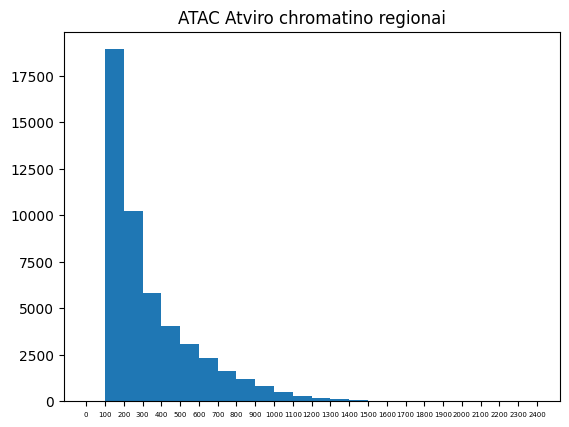

In [40]:
atac_lengths = atac['width']

print("Medianos")
print(atac_lengths.median())

print("\nModa")
print(atac_lengths.mode())

print("\nVidurkiai")
print(atac_lengths.mean())

print("\nSumos")
s1 = atac_lengths.sum()
print(s1)

plt.hist(atac_lengths, bins=bins, range=(-50, 1000))
plt.title("ATAC Atviro chromatino regionai")
plt.xticks(bins, fontsize = 5)
plt.show()

In [34]:
import pyreadr

result = pyreadr.read_r('../Data/DNAseq_dt.RDS')
dnaseq = result[None]
print(dnaseq.head())

  seqnames    start      end  width strand   study
0        1  3062584  3062721    138      *  DNAseq
1        1  3062853  3063133    281      *  DNAseq
2        1  3343577  3343809    233      *  DNAseq
3        1  3445798  3445915    118      *  DNAseq
4        1  3445996  3446201    206      *  DNAseq


Medianos
208.0

Moda
0    102
dtype: int32

Vidurkiai
279.0600486049159

Sumos
27214215


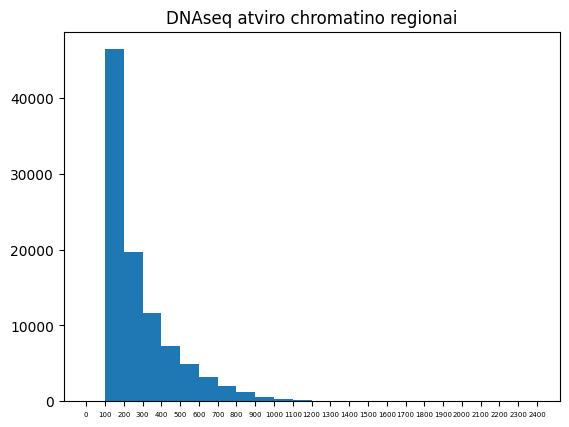

In [42]:
dnaseq_lengths = dnaseq['width']

print("Medianos")
print(dnaseq_lengths.median())

print("\nModa")
print(dnaseq_lengths.mode())

print("\nVidurkiai")
print(dnaseq_lengths.mean())

print("\nSumos")
s1 = dnaseq_lengths.sum()
print(s1)

plt.hist(dnaseq_lengths, bins=bins, range=(-50, 1000))
plt.title("DNAseq atviro chromatino regionai")
plt.xticks(bins, fontsize = 5)
plt.show()
